# Libraries

In [127]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
import numpy as np
import torch

# Dataset

In [102]:
class Dataset():
  def __init__(self, split_portion=0.9, batch_size=64):
    self.p = split_portion
    self.batch_size = batch_size
    self.train_data, self.test_data = self.loadData()
    self.train_set, self.val_set, self.test_set = self.split()

  def loadData(self):
    '''
    Load train data and test data from MNIST dataset.
    '''
    train_data = datasets.MNIST(
        root = 'data',
        train = True,                         
        transform = ToTensor(), 
        download = True        
    )

    test_data = datasets.MNIST(
        root = 'data', 
        train = False, 
        transform = ToTensor()
    )
    return train_data, test_data

  def split(self):
    '''
    Split train set, validation set and test set from the original daset.
    Reorganise the sets into batches and shuffle them.
    '''

    # Split validation set from the training set under proportion p.
    length = len(self.train_data)
    stop = int(length * self.p)
    train, val = random_split(self.train_data, [stop, length - stop])
    
    # Reorganise datasets into batches and shuffle the batches.
    train_set = DataLoader(train, self.batch_size, shuffle=True)
    val_set = DataLoader(val, self.batch_size, shuffle=True)
    test_set = DataLoader(self.test_data, self.batch_size, shuffle=True)

    return train_set, val_set, test_set
    
  def plot(self, dataset, num_row=2, num_col=5):
    '''
    Visualise pictures from the datasets.
    '''
    # Get values and labels from the dataset
    features, labels = next(iter(dataset))
    features = features.squeeze() # Get rid of the first dimension.

    # Plot
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 1.5*num_row))
    for i in range(num_row * num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(features[i], cmap='gray')
        ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()

# CNN Network 

In [125]:
class CNN(nn.Module):
  '''
  Implementation of CNN network, which is composed by two convolution layers 
  activated by the ReLU function. Results from each convolution layer are 
  maxpooled and the final results are mapped by three fully connected layers.
  '''
  # Initialise the layers.
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(6*6*20, 100)
    self.fc2 = nn.Linear(100, 64)
    self.fc3 = nn.Linear(64, 10)

  # Connect the layers.
  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.pool(x) 
    x = self.relu(self.conv2(x))
    x = self.pool(x)    
    x = x.view(-1, 6*6*20) # Flatten
    x = self.fc1(x)
    x = self.relu(self.fc2(x))
    x = self.relu(self.fc3(x))
    return x

# Trainer

In [157]:
class Train():
  def __init__(self, model, criterion, dataset, epochs=30, lr=1e-5):
    self.model = model
    self.criterion = criterion
    self.dataset = dataset
    self.epochs = epochs
    self.lr = lr
    self.losses = self.train()
    
  def train(self):
    '''
    Trainer of the model, which utilises the Adam optimiser.
    '''
    losses = []
    self.model.train()
    optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

    # Training
    for epoch in range(self.epochs):
      print('\nEpoch: {}/{}'.format(epoch, self.epochs))
      for i, (features, labels) in enumerate(self.dataset):
        print('\rStep: {}/{}'.format(i, len(self.dataset)), end='')
        outputs = self.model(features)
        loss = self.criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

  def plot(self, x_label='Iterations', y_label='Loss', label='Loss'):
    '''
    Plot the loss for each iteration.
    '''
    x = np.arange(0, self.epochs * len(self.dataset))
    y = self.losses

    plt.style.use('default')
    fig, ax = plt.subplots(figsize = (20,10))
    ax.plot(x, y, linewidth=0.5, color='orange', label=label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()

    plt.show()

# Test

In [158]:
class Test():
  def __init__(self, model, criterion, dataset):
    self.model = model
    self.criterion = criterion
    self.dataset = dataset
    self.total, self.accs = self.test()

  def test(self):
    '''
    Calculate the accuracy using the testset data.
    '''
    model.eval() 
    with torch.no_grad():

        # Initialise the registers.
        correct = 0
        total = 0
        accs = []

        # Calculate the accuracy.
        for i, (features, labels) in enumerate(self.dataset):
            outputs = self.model(features)
            _, predicted = torch.max(outputs.data, dim=1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            acc = correct / total
            accs.append(acc)

    return total, accs

  def plot(self, x_label='The Number of Batches', y_label='Accuracy', label='Accuracy'):
    '''
    Plot the change of accuracy iteratively
    '''
    x = np.arange(0, len(self.dataset))
    y = self.accs

    plt.style.use('default')
    fig, ax = plt.subplots(figsize = (10,5))
    ax.plot(x, y, linewidth=1.5, color='orange', label=label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    
    plt.show()

# Main

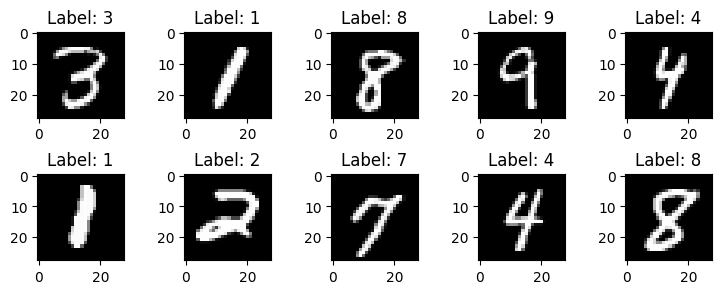

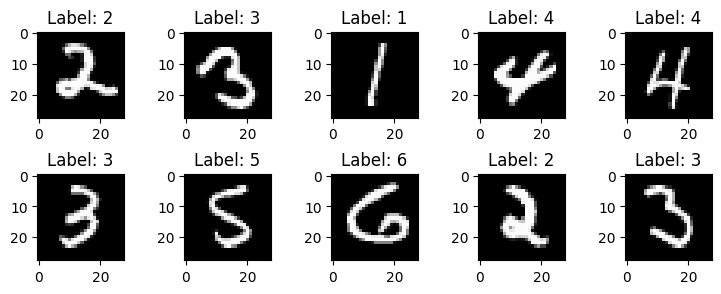


Epoch: 0/10
Step: 843/844
Epoch: 1/10
Step: 843/844
Epoch: 2/10
Step: 843/844
Epoch: 3/10
Step: 843/844
Epoch: 4/10
Step: 843/844
Epoch: 5/10
Step: 843/844
Epoch: 6/10
Step: 843/844
Epoch: 7/10
Step: 843/844
Epoch: 8/10
Step: 843/844
Epoch: 9/10
Step: 843/844

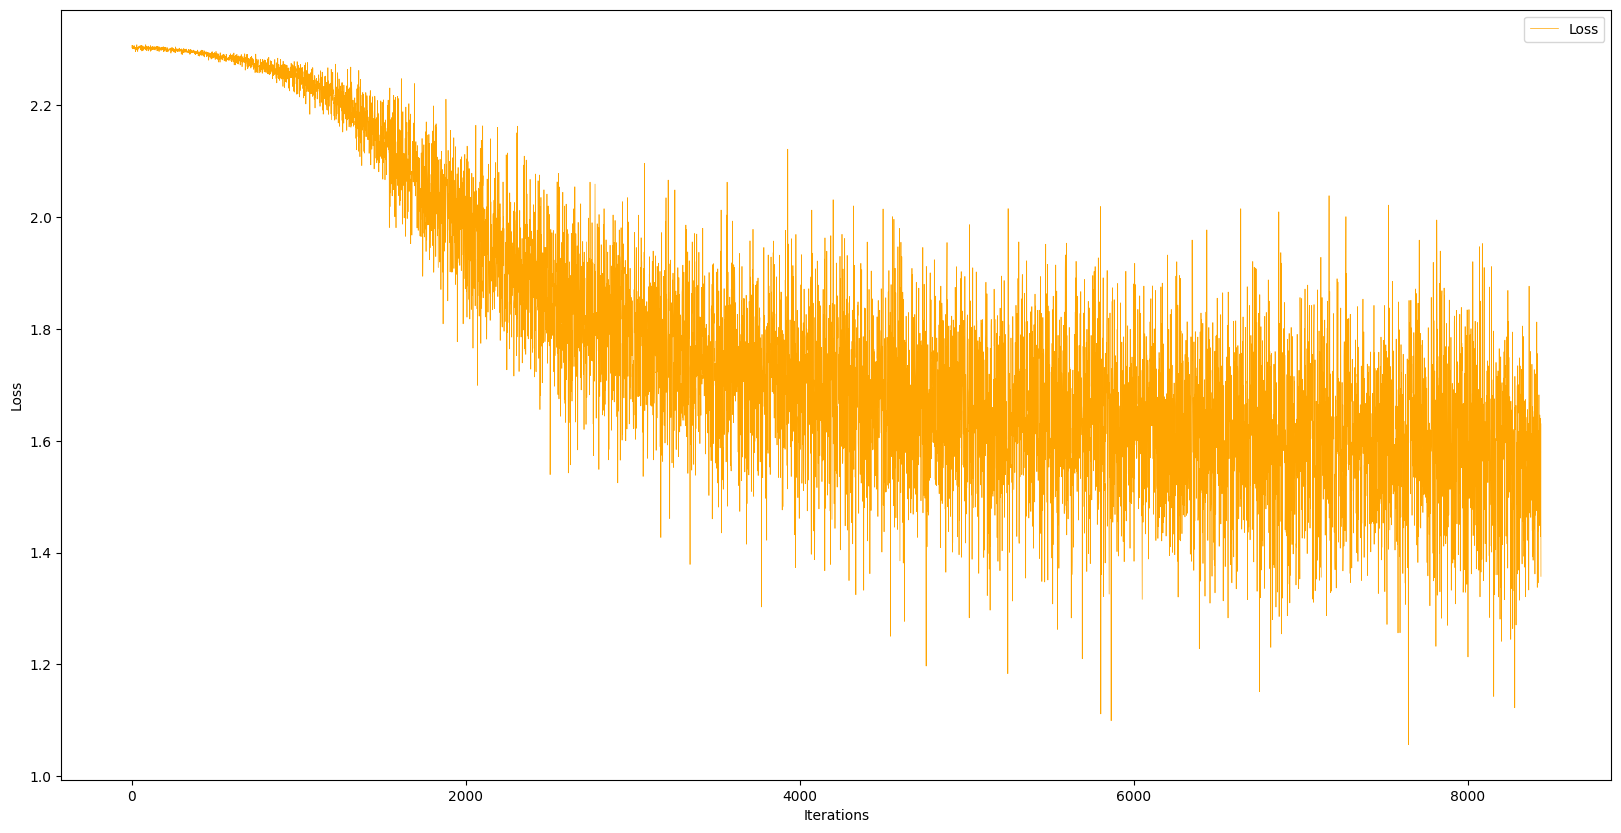

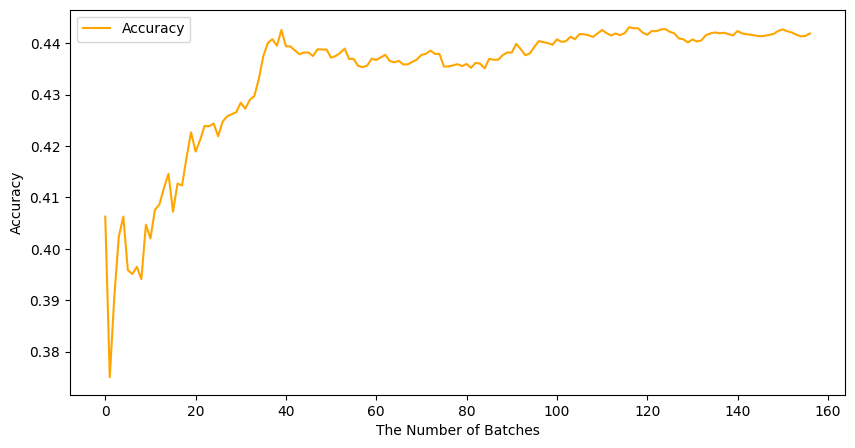

In [159]:
dataset = Dataset()

train_set = dataset.train_set
test_set = dataset.test_set

dataset.plot(train_set)
dataset.plot(test_set)

model = CNN()
criterion = nn.CrossEntropyLoss()
train = Train(model, criterion, train_set, epochs=10, lr=1e-5)
train.plot()

test = Test(model, criterion, test_set).plot()